### Now , I will use clean bank data to make model.

In [3]:
#pip install lightgbm

In [133]:
import xgboost as xgb

In [181]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import seaborn as sns

In [182]:
pd.set_option('display.max_columns', 23)

In [ ]:
pd.set_option('display.max_rows', 999)

In [207]:
bank_model=pd.read_csv('clean_data.csv')

In [208]:
bank_model.head()

,age,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,y
0,9.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
1,5.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
2,5.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
3,9.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
4,9.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no


In [212]:
bank_model.columns

Index(['age', 'education', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'default_yes',
       'housing_yes', 'loan_yes', 'education_unknown', 'month', 'day_of_week',
       'contact_telephone', 'campaign_2', 'campaign_3', 'campaign_4',
       'campaign_5', 'campaign_6', 'campaign_7', 'campaign_8', 'campaign_9',
       'campaign_10', 'campaign_11', 'campaign_12', 'campaign_13',
       'campaign_14', 'campaign_15', 'campaign_16', 'campaign_17',
       'campaign_18', 'campaign_19', 'campaign_20', 'campaign_21',
       'campaign_22', 'campaign_23', 'campaign_24', 'campaign_25',
       'campaign_26', 'campaign_27', 'campaign_28', 'campaign_29',
       'campaign_30', 'campaign_31', 'campaign_32', 'campaign_33',
       'campaign_34', 'campaign_35', 'campaign_37', 'campaign_39',
       'campa

In [213]:
bank_model['y'].replace(['no', 'yes'], [0,1], inplace=True)

In [194]:
#y = pd.get_dummies(bank_model['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [214]:
bank_model[0:].transpose()

,0,1,2,3,4,5,6,7,8,9,10,...,30582,30583,30584,30585,30586,30587,30588,30589,30590,30591,30592
age,9.0,5.0,5.0,9.0,9.0,2.0,2.0,2.0,3.0,9.0,4.0,...,9.0,10.0,10.0,5.0,5.0,3.0,12.0,7.0,9.0,6.0,12.0
education,1.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0,...,5.0,6.0,5.0,6.0,6.0,1.0,5.0,5.0,6.0,5.0,5.0
job_blue-collar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
job_entrepreneur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_housemaid,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
campaign_41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
campaign_42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
campaign_43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
campaign_56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
feat=bank_model.drop(columns=['y'],axis=1)
label=bank_model['y']

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size = 0.3, random_state = 103)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [217]:

# split, random_state is used for repeatable results, you should remove it if you are running your own code.
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size=0.30, random_state=42)


print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (21415, 63)
y train size:  (21415,)
X test size:  (9178, 63)
y test size:  (9178,)


In [240]:
from sklearn.svm import SVC

In [241]:
from sklearn.metrics import precision_score

In [242]:
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(precision_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[7079  939]
 [ 999  161]]
15.0


In [255]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(precision_score(y_test, xgbprd),2)*100)
XGBCV = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[7941   77]
 [1065   95]]
55.00000000000001


In [222]:
from sklearn.linear_model import LogisticRegression

In [223]:
logmodel = LogisticRegression()

In [224]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [225]:
logpred = logmodel.predict(X_test)

In [244]:

print(confusion_matrix(y_test, logpred))
print(round(precision_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[8018    0]
 [1160    0]]
0.0


In [245]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(precision_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[7172  846]
 [ 842  318]]
27.0


In [246]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(precision_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[7926   92]
 [1047  113]]
55.00000000000001


In [247]:
print('GradientBoost Reports\n',classification_report(y_test, gbkpred))

GradientBoost Reports
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      8018
           1       0.55      0.10      0.17      1160

    accuracy                           0.88      9178
   macro avg       0.72      0.54      0.55      9178
weighted avg       0.84      0.88      0.84      9178



In [248]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(precision_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[7774  244]
 [1005  155]]
39.0


In [249]:
print('Random forest Reports\n',classification_report(y_test, rfcpred))

Random forest Reports
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      8018
           1       0.39      0.13      0.20      1160

    accuracy                           0.86      9178
   macro avg       0.64      0.55      0.56      9178
weighted avg       0.82      0.86      0.83      9178



In [250]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(precision_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[ 140 7878]
 [   1 1159]]
13.0


In [251]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(precision_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[7972   46]
 [1120   40]]
47.0


In [258]:
models = pd.DataFrame({
                'Models': ['xgb','Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors','Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [XGBCV,RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, GBKCV]})

models.sort_values(by='Score', ascending=False)


,Models,Score
0,xgb,0.873219
4,K-Near Neighbors,0.514520
7,Gradient Boosting,0.480499
1,Random Forest Classifier,0.368017
2,Decision Tree Classifier,0.257021
3,Support Vector Machine,0.141539
6,Gausian NB,0.127938
5,Logistic Model,0.000000


#### We observe that XGBoost and  Gradient Boosting performance are best so now we will tune hyperparameter for XGBoost and Gradient Boosting

#### Training and tuning of XGBoost model
 #### Parameter dictionary

In [266]:
import xgboost as xgb

In [267]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [268]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [272]:
params['eval_metric'] = "precision"

In [273]:
num_boost_round = 999

In [274]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

XGBoostError: [17:10:29] src/metric/metric.cc:23: Unknown metric function precision
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012d739e19 dmlc::LogMessageFatal::~LogMessageFatal() + 57
  [bt] (1) 2   libxgboost.dylib                    0x000000012d7bc06d xgboost::Metric::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&) + 1149
  [bt] (2) 3   libxgboost.dylib                    0x000000012d733eee xgboost::LearnerImpl::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&) + 606
  [bt] (3) 4   libxgboost.dylib                    0x000000012d756323 XGBoosterUpdateOneIter + 131
  [bt] (4) 5   libffi.6.dylib                      0x000000010f875884 ffi_call_unix64 + 76
  [bt] (5) 6   ???                                 0x00007ffee1f1e840 0x0 + 140732689147968



In [262]:
#from sklearn.metrics import precision_score, accuracy_score

In [28]:
#from sklearn.metrics import confusion_matrix, precision_score

In [29]:
#from sklearn.model_selection import cross_val_score

In [38]:
 #from sklearn.metrics import accuracy_score

In [39]:
#from sklearn import metrics

In [40]:
#from sklearn.metrics import roc_curve

In [56]:
from sklearn.metrics import classification_report

In [57]:
]print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

KNN Confusion Matrix
 [[7972   46]
 [1120   40]]


Recall - Specificity
TN / (TN + FP) [ MATRIX LINE 1 ]

For all NEGATIVE(0) REAL VALUES how much we predict correct ?

other way to understand, our real test set has 7163+116 = 7279 clients that didin't subscribe(0), and our model predict 98% correct or 7163 correct and 116 incorrect

In [58]:
print(round(7801 /(7801 + 234),2))

0.97


Recall - Sensitivity
TP / (TP + FN) [ MATRIX LINE 2 ]

For all POSITIVE(1) REAL VALUES how much we predict correct ?

other way to understand, our real test set has 7801 + 234 = 8035 clients that subscribe(1), and our model predict 26% correct or 253 correct and 706 incorrect, BUT REMEMBER, its best we miss by False negative instead of False Positive

In [59]:
print(round(7801 /(7801 + 234),2))

0.97


Precision
TN / (TN + FN) [ MATRIX COLUMN 1 ]

For all NEGATIVE(0) PREDICTIONS by our model, how much we predict correct ?

other way to understand, our model pointed 7163 + 706 = 7869 clients that didin't subscribe(0), and our model predict 91% correct or 7163 correct and 706 incorrect

In [60]:
print(round(231 /(231 + 234),2))

0.5


F1-SCORE
F1-Score is a "median" of Recall and Precision, consider this when you want a balance between this metrics
F1 = 2(Precision(0) Recall(0)) / (Precision(0) + Recall(0))

In [61]:
F1_0 = 2*0.97*0.97/(0.97+0.97)
round(F1_0,2)

0.97

In [260]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      8018
           1       0.47      0.03      0.06      1160

    accuracy                           0.87      9178
   macro avg       0.67      0.51      0.50      9178
weighted avg       0.82      0.87      0.82      9178



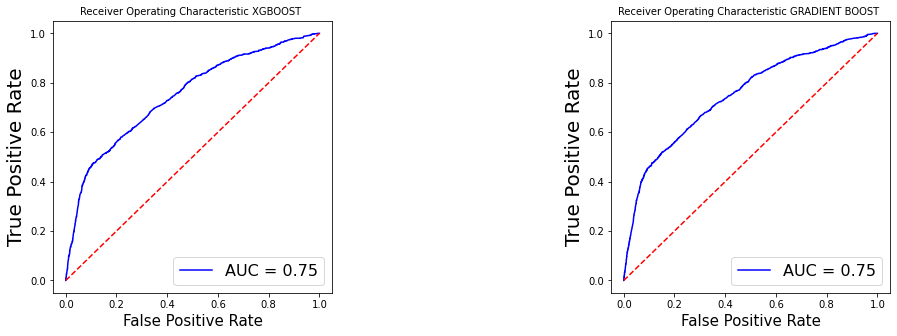

In [70]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

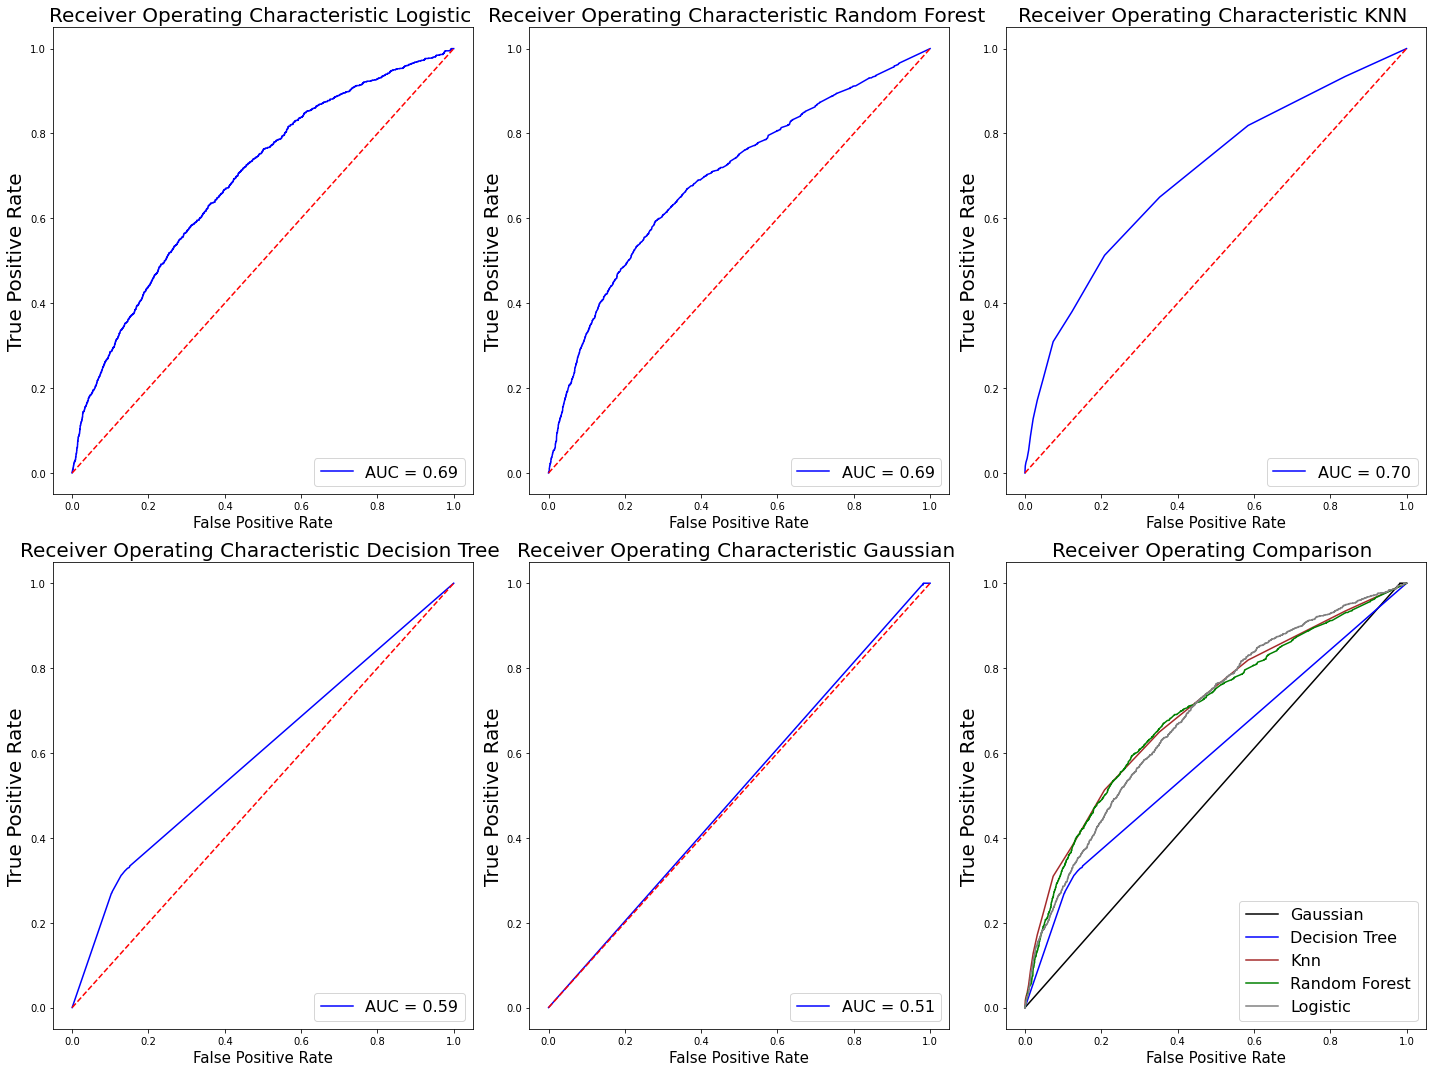

In [71]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})
#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)
ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})
#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 